In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('/content/placement.csv')

In [4]:
df.head()

Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0

In [6]:
df.shape

(100, 4)

In [7]:
df=df.iloc[:,1:]

#steps
#1.preprocess+eda+feature selection
#2.extract input and output cols
#4.scale the values
#3.train/test split
#5.train the  model
#6.evaluate model performance/model selection
#7.deploy the model

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [10]:
import matplotlib.pyplot as plt

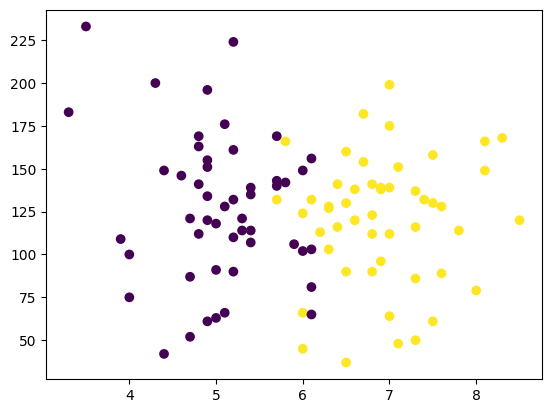

In [13]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [16]:
x=df.iloc[:,:2]
y=df.iloc[:,2]

In [17]:
x

cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]

In [18]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler=StandardScaler()  #object of class standard scaler

In [50]:
x_train=scaler.fit_transform(x_train)

In [51]:
x_test=scaler.transform(x_test)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
clf=LogisticRegression()

In [54]:
#model_training
clf.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred=clf.predict(x_test)

In [56]:
y_test

39    0
70    1
54    1
21    1
43    1
29    1
52    1
59    0
1     0
97    1
82    1
61    1
14    0
36    0
27    1
Name: placement, dtype: int64

In [57]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,y_pred)

0.6

In [58]:
x_train

array([[ 1.57103666, -0.21201582],
       [ 1.14871498, -0.16291134],
       [ 0.13514294,  0.22992452],
       [-0.8784291 ,  0.69641709],
       [-0.70950043,  0.13171555],
       [ 0.89532197,  1.87492466],
       [-0.8784291 , -0.06470238],
       [ 0.72639329, -0.8012696 ],
       [-1.04735777, -0.87492633],
       [ 0.30407161,  0.13171555],
       [ 1.31764365,  0.18082003],
       [ 0.0506786 , -1.90612045],
       [ 0.47300028,  0.18082003],
       [-0.96289344,  0.45089468],
       [-1.30075078,  0.64731261],
       [ 0.72639329, -0.2611203 ],
       [ 0.47300028,  0.91738726],
       [-0.62503609,  0.9419395 ],
       [-0.20271441,  1.13835743],
       [-1.72307246, -0.33477703],
       [-0.79396476, -0.11380686],
       [-0.54057175, -0.21201582],
       [-1.63860813, -0.5557472 ],
       [ 0.47300028, -0.8012696 ],
       [ 0.9797863 , -1.83246372],
       [ 0.81085763,  0.37723796],
       [ 0.55746462, -0.06470238],
       [ 2.16228701, -0.06470238],
       [-0.45610742,

In [59]:
x_test

array([[-5.97316762, -2.99688675],
       [-4.76034952, -3.00834019],
       [-4.68900728, -2.99990081],
       [-4.18961159, -2.99387269],
       [-4.40363831, -2.99990081],
       [-4.26095383, -3.01738238],
       [-4.26095383, -2.97940519],
       [-5.83048314, -3.01738238],
       [-5.04571848, -3.02099925],
       [-4.47498055, -2.9751855 ],
       [-4.61766503, -3.06259332],
       [-4.0469271 , -3.00231207],
       [-4.903034  , -3.02280769],
       [-5.18840296, -3.00050363],
       [-4.97437624, -3.01014863]])

In [60]:
y_train

55    1
72    1
71    1
89    0
86    0
     ..
49    0
80    0
19    0
15    0
0     1
Name: placement, Length: 85, dtype: int64

In [61]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

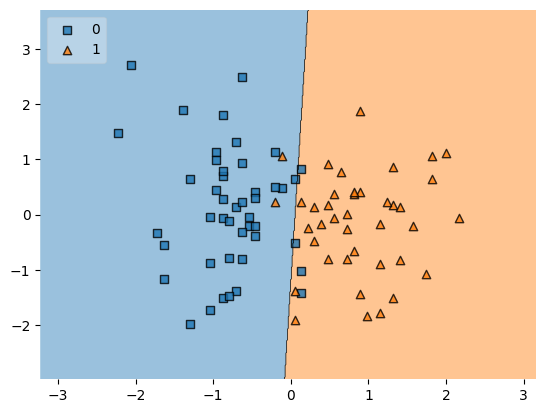

In [62]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [63]:
import pickle

In [64]:
pickle.dump(clf,open('model.pkl','wb'))